In [67]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("marketing_train.csv")
test_data = pd.read_csv("marketing_test.csv")

In [68]:
train_data

,TV_ads,Radio_ads,WWW_ads,revenue
0,47.86,52.46,165.98,39.26
1,55.20,77.40,171.70,38.90
2,52.01,68.01,294.83,49.51
3,61.96,86.86,183.18,40.56
4,40.91,30.41,149.53,40.21
...,...,...,...,...
145,20.47,15.07,342.31,45.17
146,28.83,54.13,267.99,42.73
147,32.03,27.73,103.89,39.83
148,14.53,19.03,221.99,39.43


In [69]:
test_data

,TV_ads,Radio_ads,WWW_ads,revenue
0,39.42,63.92,346.06,50.02
1,18.74,35.94,318.32,46.44
2,22.71,45.61,185.03,39.61
3,13.88,19.78,198.54,42.58
4,17.18,17.38,297.14,43.38


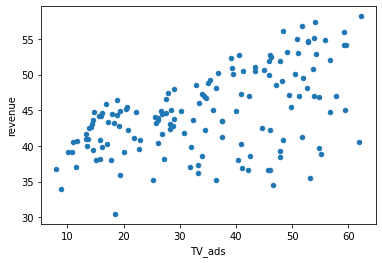

In [70]:
# Plots to understand the data
train_data.plot.scatter(x='TV_ads', y='revenue')

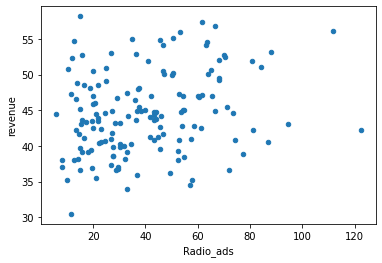

In [71]:
train_data.plot.scatter(x='Radio_ads', y='revenue')

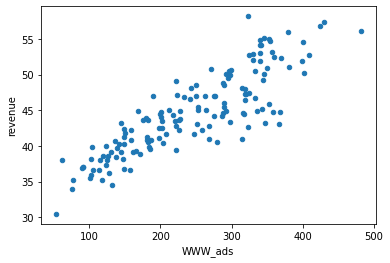

In [72]:
train_data.plot.scatter(x='WWW_ads', y='revenue')

### Fitting linear regression models

In [73]:
from sklearn.linear_model import LinearRegression

# Simple linear regression model with only one attribute WWW_ads
model1 = LinearRegression()
model1.fit(X=train_data[['WWW_ads']], y=train_data['revenue'])

LinearRegression()

In [74]:
# plot the line to see how it fits the data
# use matplotlib library for more complex plots (colab has matplotlib, for other enviroment, you should install it with pip package manager like previous libraries)
import matplotlib.pyplot as plt

# get model parameters (fitted line slope and intercept)
m = model1.coef_
b = model1.intercept_

print('slope of model 1:', m)
print('intercept of model 1:', b)


slope of model 1: [0.05232492]
intercept of model 1: 31.92511466618184


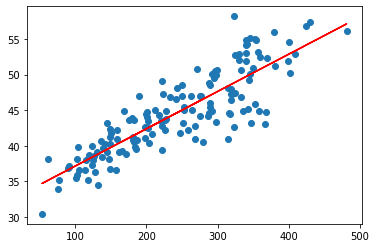

In [75]:
plt.scatter(train_data['WWW_ads'], train_data['revenue'])
plt.plot(train_data['WWW_ads'], m*train_data['WWW_ads'] + b, c='red')

**Predict Test Data and Evaluate the Model**

In [76]:
predicted_val1 = model1.predict(test_data[['WWW_ads']])
print('predicted values using model 1:', predicted_val1)

# get real values in the form of a numpy array
real_values = test_data['revenue'].to_numpy()
print('real values:', real_values)

diff1_array = predicted_val1 - real_values
# convert the difference to absolute values
diff1_array = np.absolute(diff1_array)
diff1_sum = np.sum(diff1_array)

print('the sum of the differences between real and predicted values for model 1 is:', diff1_sum)

predicted values using model 1: [50.032675   48.58118184 41.60679382 42.31370343 47.47294012]
real values: [50.02 46.44 39.61 42.58 43.38]
the sum of the differences between real and predicted values for model 1 is: 8.509887351431722


In [77]:
# now we build a model using two attributes
model2 = LinearRegression()
model2.fit(X=train_data[['WWW_ads', 'TV_ads']], y=train_data['revenue'])

LinearRegression()

In [80]:
# note that we have 2 slopes now since we have two attributes 
print('slopes of model 2:', model2.coef_)
print('intercept of model 2:', model2.intercept_)

slopes of model 2: [0.04712734 0.12094459]
intercept of model 2: 29.01296822802504


In [81]:
predicted_val2 = model2.predict(test_data[['WWW_ads', 'TV_ads']])
print('predicted values using model 2:', predicted_val2)

# note that real_values are the same and unchanged
print('real values:', real_values)

diff2_array = predicted_val2 - real_values
# convert the difference to absolute values
diff2_array = np.absolute(diff2_array)
diff2_sum = np.sum(diff2_array)

# note that the sum of the differences is less than model 1 (we get better performance)
print('the sum of the differences between real and predicted values for model 2 is:', diff2_sum)

predicted values using model 2: [50.08949112 46.28104462 40.47959152 40.04834116 45.09421401]
real values: [50.02 46.44 39.61 42.58 43.38]
the sum of the differences between real and predicted values for model 2 is: 5.343910865450127


In [82]:
#now we build a model using three attributes
model3 = LinearRegression()
model3.fit(X=train_data[['WWW_ads', 'TV_ads', 'Radio_ads']], y=train_data['revenue'])

LinearRegression()

In [83]:
# note that we have 3 slopes now since we have three attributes 
print('slopes of model 3:', model3.coef_)
print('intercept of model 3:', model3.intercept_)

slopes of model 3: [ 0.05015109  0.14005184 -0.04523732]
intercept of model 3: 29.429437443448688


In [84]:
predicted_val3 = model3.predict(test_data[['WWW_ads', 'TV_ads', 'Radio_ads']])
print('predicted values using model 3:', predicted_val2)

# note that real_values are the same and unchanged
print('real values:', real_values)

diff3_array = predicted_val3 - real_values
# convert the difference to absolute values
diff3_array = np.absolute(diff3_array)
diff3_sum = np.sum(diff3_array)

# note that the sum of the differences is worse than model 1 (we get lower performance by adding more attributes!)
print('the sum of the differences between real and predicted values for model 3 is:', diff3_sum)

predicted values using model 3: [50.08949112 46.28104462 40.47959152 40.04834116 45.09421401]
real values: [50.02 46.44 39.61 42.58 43.38]
the sum of the differences between real and predicted values for model 3 is: 5.5855631866051425
